In [64]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

In [55]:
realtor = pd.read_csv("../data/realtor_housing_metrics.csv", low_memory = True)

C:\Users\kidsa\AppData\Local\Temp\ipykernel_25888\2438989791.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  realtor = pd.read_csv("../data/realtor_housing_metrics.csv", low_memory = True)


In [56]:
realtor

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202404,43016,"dublin, oh",509475.0,0.0355,0.0783,27.0,0.1739,0.3500,13.0,...,701794.0,0.0201,0.4060,66.0,0.3367,0.2596,1.4074,0.1900,-0.1926,0.0
1,202404,53158,"pleasant prairie, wi",537400.0,-0.0227,0.2798,40.0,0.2742,0.2742,39.0,...,592244.0,-0.0369,0.0273,43.0,0.3030,0.2286,0.0886,0.0563,-0.0727,1.0
2,202404,56156,"luverne, mn",359975.0,0.2417,0.4405,13.0,-0.0714,-0.2353,50.0,...,390836.0,0.2332,0.4853,28.0,0.2727,0.4000,1.1923,0.6209,0.8982,1.0
3,202404,48026,"fraser, mi",244975.0,-0.0197,0.2531,9.0,-0.0556,0.7000,46.0,...,229468.0,-0.0647,0.0969,22.0,-0.1400,0.5357,1.4706,-0.3072,-0.5294,1.0
4,202404,28448,"kelly, nc",549000.0,NaN,1.7519,1.0,NaN,0.0000,18.0,...,549000.0,NaN,1.7519,1.0,0.0000,0.0000,1.0000,NaN,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739432,201607,68831,"dannebrog, ne",387450.0,NaN,NaN,4.0,NaN,NaN,166.0,...,376200.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2739433,201607,56356,"new munich, mn",219900.0,NaN,NaN,1.0,NaN,NaN,256.0,...,219900.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2739434,201607,30813,"grovetown, ga",207995.0,NaN,NaN,393.0,NaN,NaN,62.0,...,215649.0,NaN,NaN,393.0,NaN,NaN,NaN,NaN,NaN,NaN
2739435,201607,89122,"las vegas, nv",169900.0,NaN,NaN,162.0,NaN,NaN,57.0,...,167564.0,NaN,NaN,345.0,NaN,NaN,1.1481,NaN,NaN,NaN


In [57]:
realtor.columns

Index(['month_date_yyyymm', 'postal_code', 'zip_name', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_cou

In [58]:
# Check missing values for each column
realtor.isna().mean()

month_date_yyyymm                          0.000000
postal_code                                0.000000
zip_name                                   0.023320
median_listing_price                       0.002861
median_listing_price_mm                    0.151948
median_listing_price_yy                    0.182674
active_listing_count                       0.001889
active_listing_count_mm                    0.155824
active_listing_count_yy                    0.188142
median_days_on_market                      0.010589
median_days_on_market_mm                   0.159665
median_days_on_market_yy                   0.192626
new_listing_count                          0.001219
new_listing_count_mm                       0.468419
new_listing_count_yy                       0.469170
price_increased_count                      0.001219
price_increased_count_mm                   0.903227
price_increased_count_yy                   0.894822
price_reduced_count                        0.001219
price_reduce

Remove the "_mm" & "_yy" columns

In [59]:
realtor = realtor[['month_date_yyyymm', 'postal_code', 'zip_name', 'median_listing_price',
       #'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count',
        #'active_listing_count_mm',
       #'active_listing_count_yy',
        'median_days_on_market',
       #'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count',
        #'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count',
        #'price_increased_count_mm',
       #'price_increased_count_yy',
        'price_reduced_count',
       #'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count',
        #'pending_listing_count_mm',
       #'pending_listing_count_yy',
        'median_listing_price_per_square_foot',
       #'median_listing_price_per_square_foot_mm',
       #'median_listing_price_per_square_foot_yy',
        'median_square_feet',
       #'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price',
        #'average_listing_price_mm',
       #'average_listing_price_yy',
        'total_listing_count',
       #'total_listing_count_mm', 'total_listing_count_yy',
        'pending_ratio',
       #'pending_ratio_mm', 'pending_ratio_yy',
        'quality_flag']]

Last row includes some metadata that needs to be removed

In [60]:
realtor = realtor[:-1]

In [61]:
realtor

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
0,202404,43016,"dublin, oh",509475.0,27.0,13.0,52.0,0.0,10.0,38.0,215.0,2143.0,701794.0,66.0,1.4074,0.0
1,202404,53158,"pleasant prairie, wi",537400.0,40.0,39.0,18.0,0.0,6.0,4.0,218.0,2118.0,592244.0,43.0,0.0886,1.0
2,202404,56156,"luverne, mn",359975.0,13.0,50.0,8.0,0.0,6.0,16.0,145.0,2459.0,390836.0,28.0,1.1923,1.0
3,202404,48026,"fraser, mi",244975.0,9.0,46.0,12.0,0.0,4.0,13.0,151.0,1324.0,229468.0,22.0,1.4706,1.0
4,202404,28448,"kelly, nc",549000.0,1.0,18.0,0.0,0.0,0.0,1.0,201.0,2727.0,549000.0,1.0,1.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739431,201607,59829,"darby, mt",389900.0,78.0,67.0,12.0,0.0,16.0,NaN,200.0,2355.0,763928.0,78.0,NaN,NaN
2739432,201607,68831,"dannebrog, ne",387450.0,4.0,166.0,0.0,0.0,0.0,NaN,118.0,2393.0,376200.0,4.0,NaN,NaN
2739433,201607,56356,"new munich, mn",219900.0,1.0,256.0,0.0,0.0,0.0,NaN,72.0,3048.0,219900.0,1.0,NaN,NaN
2739434,201607,30813,"grovetown, ga",207995.0,393.0,62.0,144.0,20.0,44.0,NaN,91.0,2255.0,215649.0,393.0,NaN,NaN


In [62]:
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'], format = '%Y%m')

In [63]:
realtor['month_date_yyyymm']

0         2024-04-01
1         2024-04-01
2         2024-04-01
3         2024-04-01
4         2024-04-01
             ...    
2739431   2016-07-01
2739432   2016-07-01
2739433   2016-07-01
2739434   2016-07-01
2739435   2016-07-01
Name: month_date_yyyymm, Length: 2739436, dtype: datetime64[ns]

In [ ]:
realtor

In [70]:
us_median_listing = realtor.groupby('month_date_yyyymm')['median_listing_price'].mean().reset_index()

<Axes: xlabel='month_date_yyyymm', ylabel='median_listing_price'>

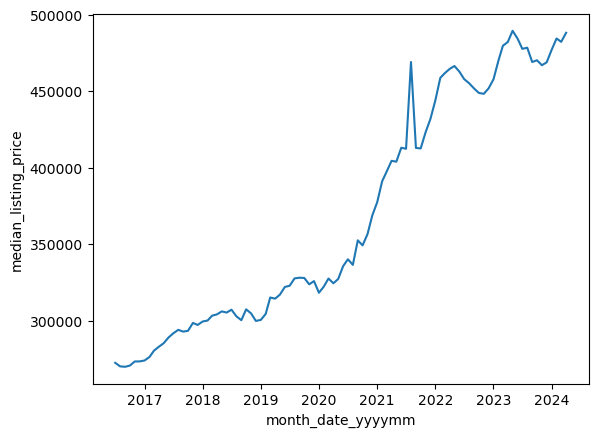

In [72]:
sns.lineplot(data = us_median_listing, x = 'month_date_yyyymm', y = 'median_listing_price')

In [75]:
us_median_listing.tail(50)

,month_date_yyyymm,median_listing_price
44,2020-03-01,327499.465457
45,2020-04-01,324370.367550
46,2020-05-01,327203.555407
47,2020-06-01,335582.162073
48,2020-07-01,340079.449435
49,2020-08-01,336404.286069
50,2020-09-01,352490.135864
51,2020-10-01,349169.130270
52,2020-11-01,356513.704778
53,2020-12-01,368742.230394
